In [1]:
import numpy as np
import time
from grid_world import standard_grid,negative_grid
SMALL_TOL=10e-10
ALL_Actions=['U','D','L','R',]
GAMMA=0.9
def print_values(V, g):
  print("Values:")
  for i in range(g.width):
    print("---------------------------")
    for j in range(g.height):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  print("Policy:")
  for i in range(g.width):
    print("---------------------------")
    for j in range(g.height):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")
    

In [2]:
def play_game(grid,policy):
    start_states=list(grid.actions.keys())
    start_idx=np.random.choice(len(start_states))
    grid.set_state(start_states[start_idx])
    
    s=grid.current_state()
    a=np.random.choice(ALL_Actions)
    states_actions_rewards=[(s,a,0)] # current state|action with no reward
    seen_states=set()
    while True:
        old_s=grid.current_state()
        r=grid.move(a)
        s=grid.current_state()
        if s in seen_states:
            states_actions_rewards.append((s,None,-100))
            break
        elif grid.game_over():
            states_actions_rewards.append((s,None,r))
            break
        else: #go to next action
            a=policy[s]
            states_actions_rewards.append((s,a,r)) #rewards for the current state is recorded
        seen_states.add(s)
    G=0
    states_actions_returns=[]
    first=True
    for s,a,r in reversed(states_actions_rewards):
        if first:
            first=False
        else:
            states_actions_returns.append((s,a,G))
        G=r+GAMMA*G
    states_actions_returns.reverse()
    return states_actions_returns

In [3]:
def max_dict(d):
    max_key=None
    max_val=float('-inf')
    for k,v in d.items():
        if v>max_val:
            max_val=v
            max_key=k
    return max_key,max_val

In [4]:
grid=negative_grid()
print("rewards:")
print_values(grid.rewards,grid)

rewards:
Values:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|


In [5]:
policy = {}
for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_Actions)

In [28]:
# Main starts here

5000
Values:
---------------------------
 0.12| 0.80| 1.00| 0.00|
---------------------------
 0.11| 0.00| 0.80| 0.00|
---------------------------
 0.31| 0.46| 0.62| 0.46|
Policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  D  |     |  U  |     |
---------------------------
  R  |  R  |  U  |  L  |


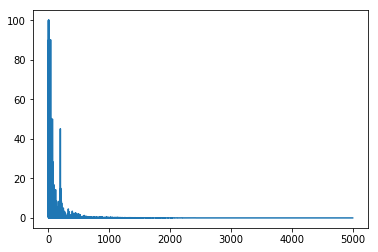

In [12]:
# initialize V(s) = 0
Q = {}
returns={}
states=grid.all_states()

for s in states:
    if s in grid.actions:
        Q[s] = {}
        for a in ALL_Actions:
            Q[s][a]=0
            returns[(s,a)]=[]
    else:
        pass

# value iteration
deltas=[]
iter_n=0
for t in range(5000):
    iter_n+=1
    biggest_change=0
    states_actions_returns=play_game(grid,policy)
    seen_state_action_pairs=set()
    for s,a,G in states_actions_returns:
        sa=(s,a)
        if sa not in seen_state_action_pairs:
            old_q=Q[s][a]
            returns[sa].append(G)
            Q[s][a]=np.mean(returns[sa])
            biggest_change=max(biggest_change,np.abs(old_q-Q[s][a]))
            seen_state_action_pairs.add(sa)
    deltas.append(biggest_change)
    #update policy
    for s in policy.keys():
        policy[s]=max_dict(Q[s])[0]
    
    
    print(iter_n,end='\r')
#     time.sleep(0.001)
#check the result
print()
V = {}
for s, Qs in Q.items():
    V[s] = max_dict(Q[s])[1]

print_values(V,grid)
print_policy(policy,grid)

import matplotlib.pyplot as plt
plt.plot(deltas)
plt.show()